In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.feature_selection as skf

In [2]:
classes = ['empty', 'comcuc', 'cowpig1', 'eucdov', 'eueowl1', 'grswoo', 'tawowl1']
dataset = {}

for clazz in classes:
    dataset[clazz] = {'data': [], 'labels': []}
    folder = f'dataset/{clazz}'
    for _, __, files in os.walk(folder):
        for file in files:
            if 'labels' in file:
                continue
            data = np.load(f'{folder}/{file}')
            labels = np.load(f'{folder}/{file.split(".")[0]}.labels.npy')
            dataset[clazz]['data'].append(data)
            dataset[clazz]['labels'].append(labels)

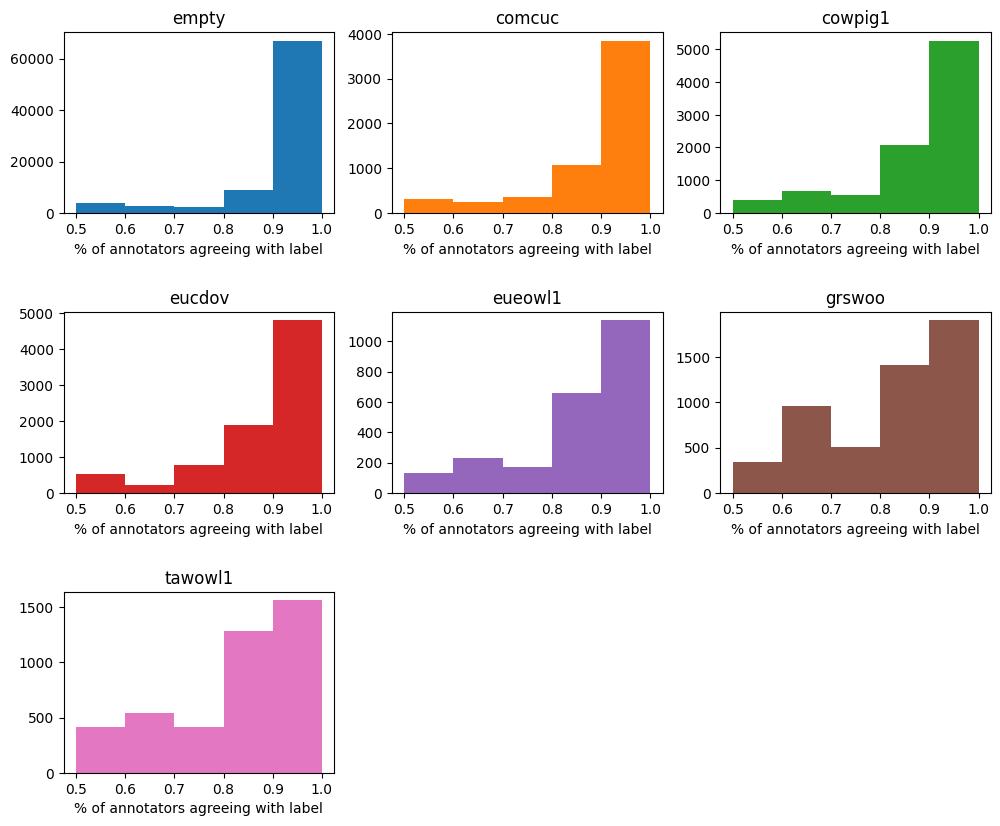

In [3]:
agreement = {}

for clazz in dataset:
    agreement[clazz] = []

for clazz in dataset:
    for labels in dataset[clazz]['labels']:
        for label in labels:
            percentage = np.sum(label[1:] == label[0]) / (len(label) - 1)
            agreement[classes[label[0]]].append(percentage)

fig, axes = plt.subplots(3, 3, figsize=(10, 8))
fig.delaxes(axes[2,1])
fig.delaxes(axes[2,2])
fig.tight_layout(h_pad=5)

axes = axes.flatten()
for clazz, i in zip(agreement.keys(), range(len(agreement))):
    axes[i].hist(agreement[clazz], bins=5, color=f'C{i}', range=[0.5, 1])
    axes[i].set_title(clazz)
    axes[i].set_xlabel('% of annotators agreeing with label')

Text(0, 0.5, '# of instances')

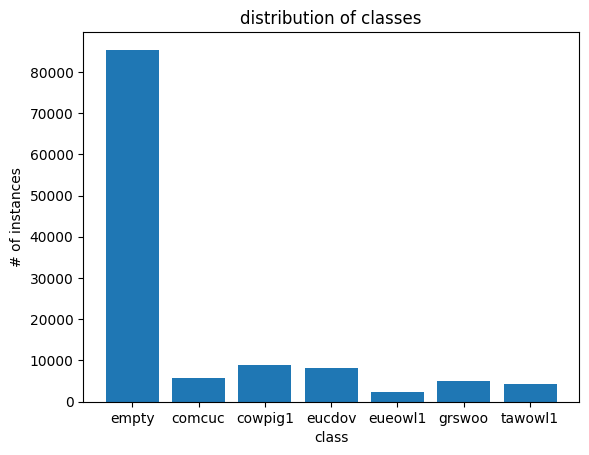

In [4]:
occurences = np.zeros(len(dataset))

for clazz, i in zip(dataset, range(len(dataset))):
    for labels in dataset[clazz]['labels']:
      occurences[i] += np.sum(labels[:, 0] == i)
      occurences[0] += np.sum(labels[:, 0] == 0)

plt.bar(classes, occurences)
plt.title('distribution of classes')
plt.xlabel('class')
plt.ylabel('# of instances')

In [5]:
print("Shannon Entropy:")
n = np.sum(occurences)
print(-np.dot(occurences / n, np.log(occurences / n)) / np.log(len(occurences)))

print("Shannon Entropy without empty class:")
n = np.sum(occurences[1:])
print(-np.dot(occurences[1:] / n, np.log(occurences[1:] / n)) / np.log(len(occurences[1:])))

Shannon Entropy:
0.5626464929366222
Shannon Entropy without empty class:
0.9548379462219972


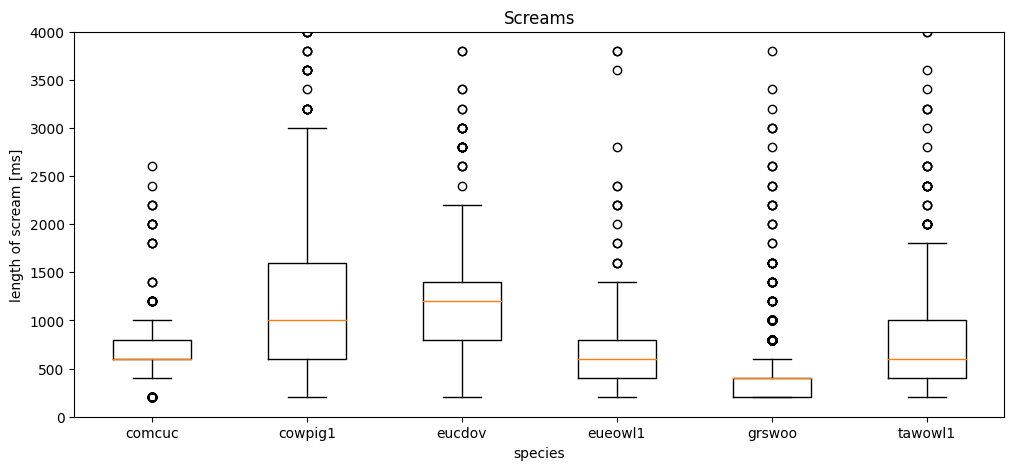

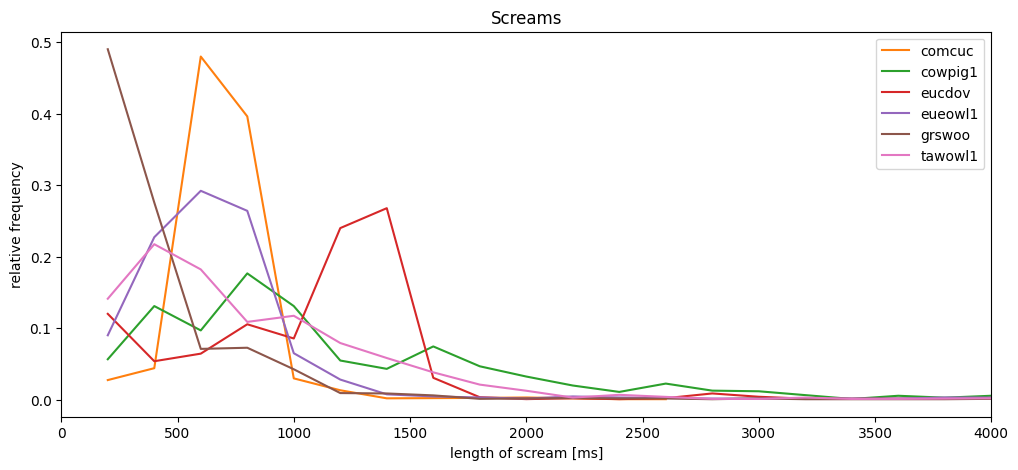

In [6]:
lengths = {}

for clazz in dataset:
    lengths[clazz] = []

for clazz, i in zip(dataset, range(len(dataset))):
    if clazz == 'empty':
        continue
    labels = np.concatenate([labels[:, 0] for labels in dataset[clazz]['labels']])
    num = 0
    for label in labels:
        if label == i:
            num += 1
        elif num != 0:
            lengths[clazz].append(num)
            num = 0

plt.figure(figsize=(12,5))
plt.title('Screams')
plt.xlabel('species')
plt.ylabel('length of scream [ms]')
plt.ylim([0, 4000])
plt.boxplot([np.array(lengths[key]) * 200 for key in lengths if key != 'empty'], labels=classes[1:])

plt.figure(figsize=(12,5))
plt.title('Screams')
plt.xlabel('length of scream [ms]')
plt.ylabel('relative frequency')
plt.xlim([0, 4000])
for clazz, i in zip(lengths.keys(), range(len(lengths))):
    if i == 0:
        continue
    unique, counts = np.unique(lengths[clazz], return_counts=True)
    plt.plot(unique * 200, counts / np.sum(counts), color=f'C{i}', label=clazz)
plt.legend()


In [7]:
X = None
Y = None

for clazz in dataset:
    if clazz == 'empty':
        continue
    clazz_data = np.concatenate(dataset[clazz]['data'])
    label_data = np.concatenate([labels[:, 0] for labels in dataset[clazz]['labels']])
    if type(X) is not np.ndarray:
        X = clazz_data
        Y = label_data
    else:
        X = np.concatenate((X, clazz_data))
        Y = np.concatenate((Y, label_data))

print(X.shape, Y.shape)

(120000, 548) (120000,)


In [8]:
R = np.corrcoef(X.T)
print(R)

[[ 1.00000000e+00  4.57497971e-01  3.95879097e-02 ... -7.64394146e-03
   4.01089306e-02  1.42710273e-01]
 [ 4.57497971e-01  1.00000000e+00  1.02194588e-01 ...  6.79391550e-02
   1.74069530e-01  4.01598704e-01]
 [ 3.95879097e-02  1.02194588e-01  1.00000000e+00 ... -2.64153864e-04
   4.54348927e-02  6.72924112e-02]
 ...
 [-7.64394146e-03  6.79391550e-02 -2.64153864e-04 ...  1.00000000e+00
   2.19123537e-01  1.31994000e-01]
 [ 4.01089306e-02  1.74069530e-01  4.54348927e-02 ...  2.19123537e-01
   1.00000000e+00  3.22409112e-01]
 [ 1.42710273e-01  4.01598704e-01  6.72924112e-02 ...  1.31994000e-01
   3.22409112e-01  1.00000000e+00]]


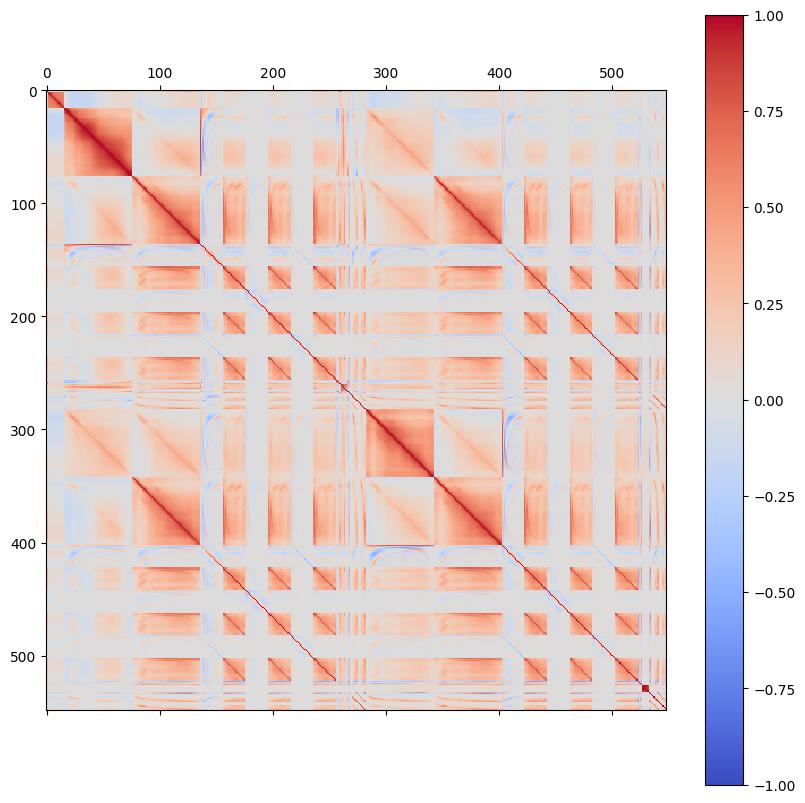

In [9]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
cax = ax.matshow(R, cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
#ticks = np.arange(0, X.shape[1], 1)
#ax.set_xticks(ticks)
#plt.xticks(rotation=90)
#ax.set_yticks(ticks)
#ax.set_xticklabels(data.columns)
#ax.set_yticklabels(data.columns)
plt.show()

In [10]:
feature_names = []
with open('dataset/feature_names.txt') as f:
    feature_names = f.read().splitlines() 
print(feature_names)

['zcr_mean', 'zcr_std', 'yin_0', 'yin_1', 'yin_2', 'yin_3', 'yin_4', 'yin_5', 'yin_6', 'yin_7', 'yin_8', 'yin_9', 'yin_10', 'yin_11', 'yin_12', 'yin_13', 'raw_melspect_mean_0', 'raw_melspect_mean_1', 'raw_melspect_mean_2', 'raw_melspect_mean_3', 'raw_melspect_mean_4', 'raw_melspect_mean_5', 'raw_melspect_mean_6', 'raw_melspect_mean_7', 'raw_melspect_mean_8', 'raw_melspect_mean_9', 'raw_melspect_mean_10', 'raw_melspect_mean_11', 'raw_melspect_mean_12', 'raw_melspect_mean_13', 'raw_melspect_mean_14', 'raw_melspect_mean_15', 'raw_melspect_mean_16', 'raw_melspect_mean_17', 'raw_melspect_mean_18', 'raw_melspect_mean_19', 'raw_melspect_mean_20', 'raw_melspect_mean_21', 'raw_melspect_mean_22', 'raw_melspect_mean_23', 'raw_melspect_mean_24', 'raw_melspect_mean_25', 'raw_melspect_mean_26', 'raw_melspect_mean_27', 'raw_melspect_mean_28', 'raw_melspect_mean_29', 'raw_melspect_mean_30', 'raw_melspect_mean_31', 'raw_melspect_mean_32', 'raw_melspect_mean_33', 'raw_melspect_mean_34', 'raw_melspect_me

['zcr_mean' 'zcr_std' 'yin_0' 'raw_melspect_mean_0' 'raw_melspect_std_0'
 'raw_mfcc_mean_0' 'raw_mfcc_mean_1' 'raw_mfcc_mean_2' 'raw_mfcc_mean_3'
 'raw_mfcc_mean_4' 'raw_mfcc_mean_5' 'raw_mfcc_mean_6' 'raw_mfcc_mean_7'
 'raw_mfcc_mean_8' 'raw_mfcc_mean_9' 'raw_mfcc_mean_10' 'raw_mfcc_mean_11'
 'raw_mfcc_mean_12' 'raw_mfcc_mean_13' 'raw_mfcc_mean_14'
 'raw_mfcc_mean_15' 'raw_mfcc_mean_16' 'raw_mfcc_mean_17'
 'raw_mfcc_mean_18' 'raw_mfcc_mean_19' 'raw_mfcc_std_0'
 'raw_mfcc_d_mean_0' 'raw_mfcc_d_mean_1' 'raw_mfcc_d_mean_2'
 'raw_mfcc_d_mean_3' 'raw_mfcc_d_mean_4' 'raw_mfcc_d_mean_5'
 'raw_mfcc_d_mean_6' 'raw_mfcc_d_mean_7' 'raw_mfcc_d_mean_8'
 'raw_mfcc_d_mean_9' 'raw_mfcc_d_mean_10' 'raw_mfcc_d_mean_11'
 'raw_mfcc_d_mean_12' 'raw_mfcc_d_mean_13' 'raw_mfcc_d_mean_14'
 'raw_mfcc_d_mean_15' 'raw_mfcc_d_mean_16' 'raw_mfcc_d_mean_17'
 'raw_mfcc_d_mean_18' 'raw_mfcc_d_mean_19' 'raw_mfcc_d_std_0'
 'raw_mfcc_d2_mean_0' 'raw_mfcc_d2_mean_1' 'raw_mfcc_d2_mean_2'
 'raw_mfcc_d2_mean_3' 'raw_mfcc_d2

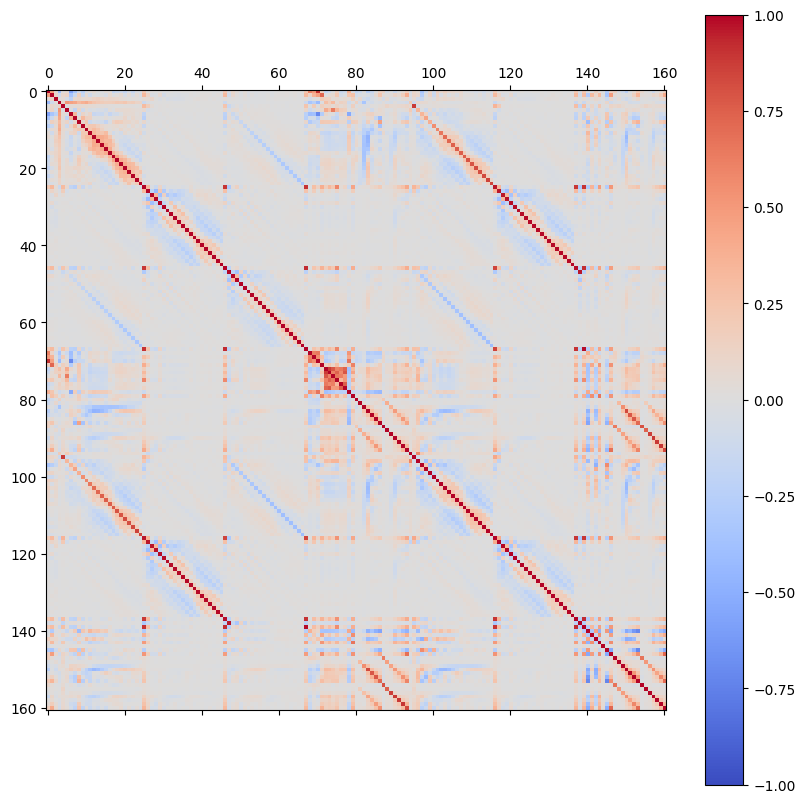

In [11]:
not_yins = np.array([not (n.startswith('yin_') and n != 'yin_0') for n in feature_names])
not_melspect = np.array([not (n.startswith('raw_melspect_mean_') and n != 'raw_melspect_mean_0') for n in feature_names])
not_melspect_std = np.array([not (n.startswith('raw_melspect_std_') and n != 'raw_melspect_std_0') for n in feature_names])
not_mfcc_std = np.array([not (n.startswith('raw_mfcc_std_') and n != 'raw_mfcc_std_0') for n in feature_names])
not_mfcc_d_std = np.array([not (n.startswith('raw_mfcc_d_std_') and n != 'raw_mfcc_d_std_0') for n in feature_names])
not_mfcc_d2_std = np.array([not (n.startswith('raw_mfcc_d2_std_') and n != 'raw_mfcc_d2_std_0') for n in feature_names])
not_cln_melspect_mean = np.array([not (n.startswith('cln_melspect_mean_') and n != 'cln_melspect_mean_0') for n in feature_names])
not_cln_melspect_std = np.array([not (n.startswith('cln_melspect_std_') and n != 'cln_melspect_std_0') for n in feature_names])
not_cln_mfcc_std = np.array([not (n.startswith('cln_mfcc_std_') and n != 'cln_mfcc_std_0') for n in feature_names])
not_cln_mfcc_d_std = np.array([not (n.startswith('cln_mfcc_d_std_') and n != 'cln_mfcc_d_std_0') for n in feature_names])
not_cln_mfcc_d2_std = np.array([not (n.startswith('cln_mfcc_d2_std_') and n != 'cln_mfcc_d2_std_0') for n in feature_names])
not_cln_mfcc_d2_mean = np.array([not (n.startswith('cln_mfcc_d2_mean_') and n != 'cln_mfcc_d2_mean_0') for n in feature_names])

trimmed = not_yins & not_melspect & not_melspect_std & not_mfcc_std &\
    not_mfcc_d_std & not_mfcc_d2_std & not_cln_melspect_mean & not_cln_melspect_std &\
    not_cln_mfcc_std & not_cln_mfcc_d_std & not_cln_mfcc_d2_std & not_cln_mfcc_d2_mean
trimmed[np.where(trimmed == True)[0][144:149]] = False #also closely related (['cln_flux_mean' 'cln_flux_std' 'cln_energy_mean' 'cln_energy_std' 'cln_power_mean'])


print(np.array(feature_names)[trimmed])
X_trim = X[:, trimmed]
R_trim = np.corrcoef(X_trim.T)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
cax = ax.matshow(R_trim, cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
plt.show()

/tmp/ipykernel_1884/3522343685.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(rotation = (90), fontsize = 8, labels = np.array(feature_names)[trimmed][order][0:40])
/tmp/ipykernel_1884/3522343685.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(rotation = (90), fontsize = 8, labels = np.array(feature_names)[trimmed][order][0:40])


<BarContainer object of 40 artists>

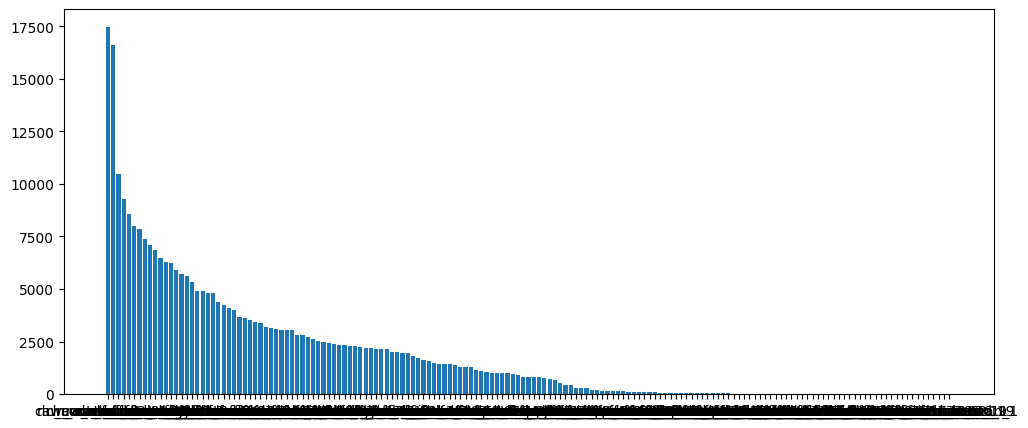

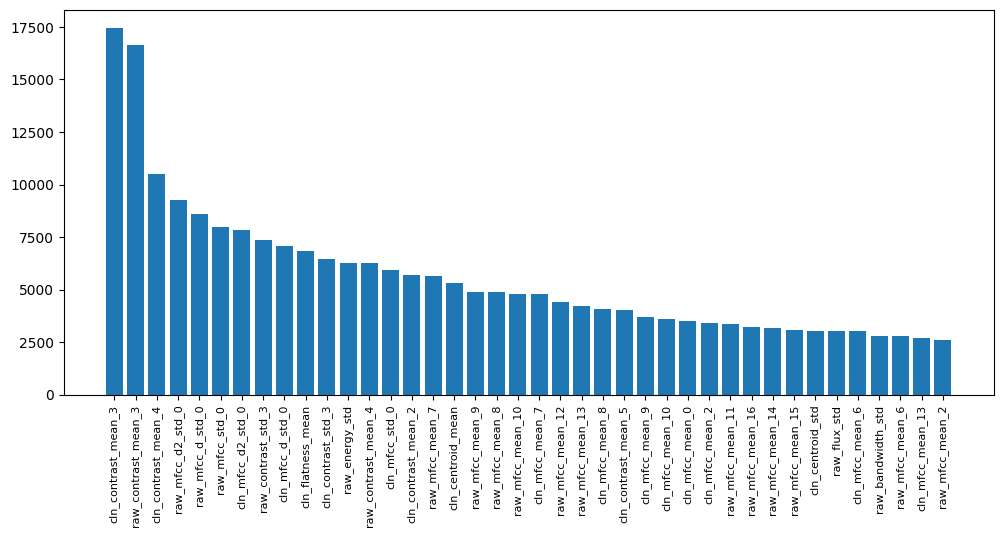

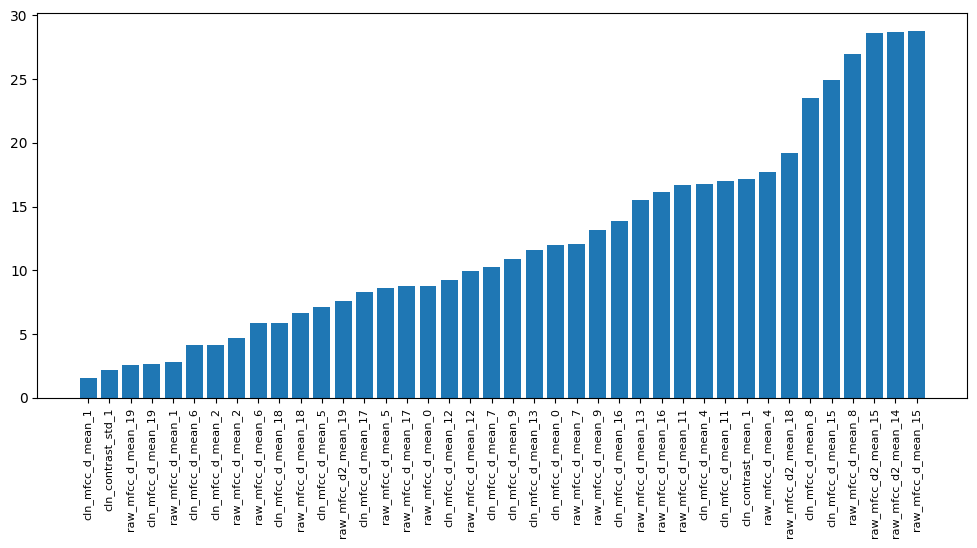

In [12]:
ranks, _ = skf.f_classif(X_trim, Y)
order = np.argsort(ranks)[::-1]

fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(111)
ax.bar(np.array(feature_names)[trimmed][order], ranks[order])

fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(111)
ax.set_xticklabels(rotation = (90), fontsize = 8, labels = np.array(feature_names)[trimmed][order][0:40])
ax.bar(np.array(feature_names)[trimmed][order][0:40], ranks[order][0:40])

order = np.argsort(ranks)
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(111)
ax.set_xticklabels(rotation = (90), fontsize = 8, labels = np.array(feature_names)[trimmed][order][0:40])
ax.bar(np.array(feature_names)[trimmed][order][0:40], ranks[order][0:40])

In [13]:
X_final = X_trim[:, ranks > 1000]
print(np.array(feature_names)[trimmed][ranks > 1000])
print(X_final.shape)

['zcr_mean' 'zcr_std' 'raw_mfcc_mean_0' 'raw_mfcc_mean_1'
 'raw_mfcc_mean_2' 'raw_mfcc_mean_3' 'raw_mfcc_mean_4' 'raw_mfcc_mean_5'
 'raw_mfcc_mean_6' 'raw_mfcc_mean_7' 'raw_mfcc_mean_8' 'raw_mfcc_mean_9'
 'raw_mfcc_mean_10' 'raw_mfcc_mean_11' 'raw_mfcc_mean_12'
 'raw_mfcc_mean_13' 'raw_mfcc_mean_14' 'raw_mfcc_mean_15'
 'raw_mfcc_mean_16' 'raw_mfcc_mean_17' 'raw_mfcc_mean_18'
 'raw_mfcc_mean_19' 'raw_mfcc_std_0' 'raw_mfcc_d_std_0'
 'raw_mfcc_d2_std_0' 'raw_flatness_mean' 'raw_centroid_mean'
 'raw_centroid_std' 'raw_flux_mean' 'raw_flux_std' 'raw_energy_mean'
 'raw_energy_std' 'raw_power_std' 'raw_bandwidth_mean' 'raw_bandwidth_std'
 'raw_contrast_mean_2' 'raw_contrast_mean_3' 'raw_contrast_mean_4'
 'raw_contrast_mean_5' 'raw_contrast_std_2' 'raw_contrast_std_3'
 'raw_contrast_std_4' 'raw_contrast_std_6' 'cln_mfcc_mean_0'
 'cln_mfcc_mean_1' 'cln_mfcc_mean_2' 'cln_mfcc_mean_4' 'cln_mfcc_mean_5'
 'cln_mfcc_mean_6' 'cln_mfcc_mean_7' 'cln_mfcc_mean_8' 'cln_mfcc_mean_9'
 'cln_mfcc_mean_10' 'c